In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

# Read the Data

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
images=[]
labels=[]
l=['non_wrinkle','wrinkles']
for i in l:
    images_per_folder=os.listdir('Datasets/Wrinkle_dataset/' + str(i))
    for j in images_per_folder:
        image=cv2.imread('Datasets/Wrinkle_dataset/' + str(i)+'/' + j)
        image=cv2.resize(image,(224,224))
        images.append(image)
        labels.append(i)
    print("Scanning images in folder "+ str(i))

Scanning images in folder non_wrinkle
Scanning images in folder wrinkles


In [3]:
import numpy as np
images=np.array(images)
labels=np.array(labels)

# Changes to in the form of 1 and 0

In [4]:
for i in range(len(labels)):
    if labels[i]=='wrinkles':
        labels[i]=1
    else:
        labels[i]=0

# Change to Categorical Variable

In [6]:
from tensorflow.keras.utils import to_categorical
target=to_categorical(labels)
target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# Train_Test_Split

In [8]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(images, target, test_size=0.1,random_state=42) 

# Model Training

# Architecture of model

In [10]:
IMG_SIZE=224
input_shape=(224,224,3)
from tensorflow.keras.applications import EfficientNetB0 as Net
from tensorflow.keras import layers
import tensorflow as tf

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
conv_base = Net(weights="imagenet", include_top=False, input_shape=input_shape)



In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

dropout_rate = 0.2
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalMaxPooling2D(name="gap"))

if dropout_rate > 0:
    model.add(layers.Dropout(dropout_rate, name="dropout_out"))

model.add(layers.Dense(2, activation="softmax", name="fc_out"))

In [12]:
conv_base.trainable = False

# Compile Model

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the Model

In [15]:
model.fit(trainX,trainY,epochs=30)

Epoch 1/30
 6/79 [=>............................] - ETA: 1:35 - loss: 1.8484 - accuracy: 0.3854

KeyboardInterrupt: 

# Predicting

In [ ]:
prd=model.predict(testX)

In [ ]:
eval=[]
for i in range(len(prd)):
    eval.append(testY[i].argmax())

In [ ]:
result=[]
for i in range(len(testY)):
    result.append(testY[i].argmax())

# Finding Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(eval,result)

# For Random Test Images

In [34]:
import cv2
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
from numpy import asarray
from PIL import Image
def extract_face(filename, required_size=(224, 224)):
    detector=MTCNN()
    pixels=cv2.imread(filename)
    results = detector.detect_faces(pixels)
    
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face = asarray(image)
    face=face.reshape(1,face.shape[0],face.shape[1],face.shape[2])
    
    return face

Image has puffed eyes


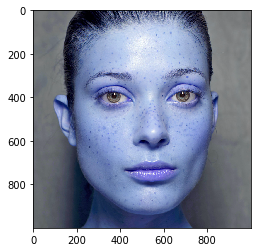

In [35]:
filename='ds1.jpg'
try:
    a=extract_face('ds1.jpg')
except:
    a=cv2.imread(filename)
    a=a.reshape(1,a.shape[0],a.shape[1],a.shape[2])

res=model.predict(a).argmax()
if res==0:
    print("Image doesn't have wrinkles")
else:
    print("Image has wrinkles")

# Save the Model

In [ ]:
model.save('D:\efficent_net')

In [37]:
from tensorflow import keras
model = keras.models.load_model('D:\efficent_net')